<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_title = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
df = pd.DataFrame(data, columns=feature_title)
df["MEDV"] = target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

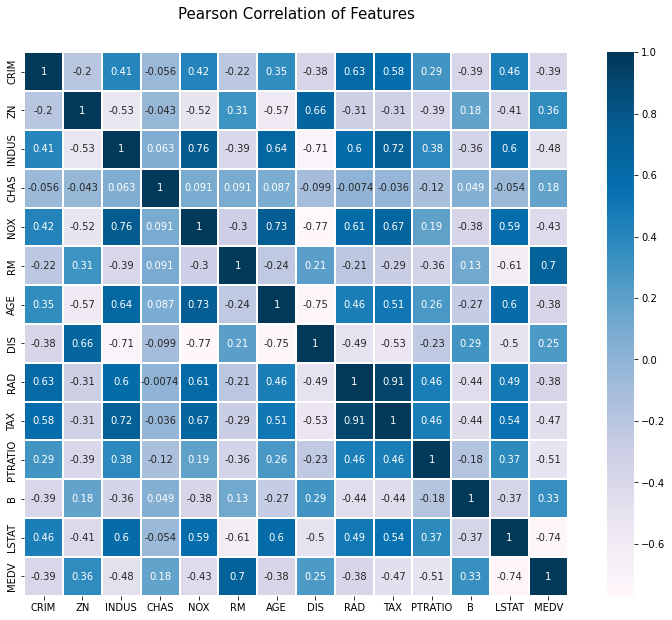

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # 美化plot 
plt.figure(figsize=(14, 10))  # display_plot_size 
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(df.astype(float).corr(), linewidths=0.1,cmap="PuBu", 
        square=True, linecolor="white", annot=True)
 # 觀察Pearson's correlation coefficient CHAS 0.18幅度最小 LSTAT-0.74幅度最大

In [ ]:
from sklearn.model_selection import train_test_split
# 分成90% 10%
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

In [ ]:
#做公式(fit)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=7)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

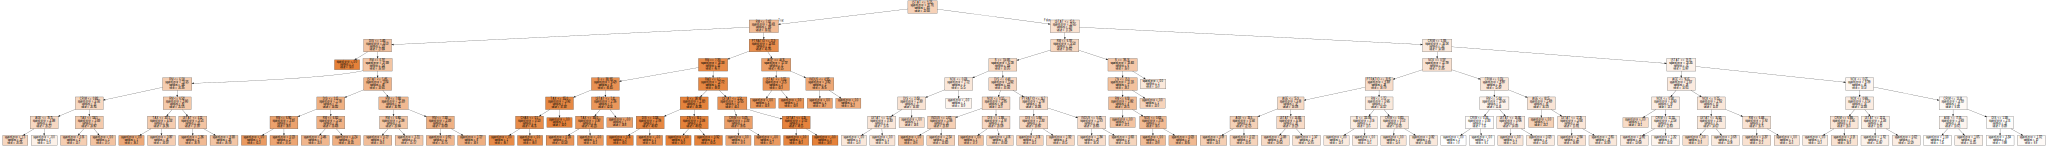

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
# reg_tree, feature_names_title, filled_color_table
gz = export_graphviz(reg, feature_names=feature_title, filled=True)
graphviz.Source(gz)

In [ ]:
# 驗證
# prediction
predict = reg.predict(x_test)
print("預測結果:", predict)
print("實際結果", y_test)
interval = np.subtract(predict, y_test)
from sklearn.metrics import r2_score
# r2_score(y_ture, y_pred)
print("預測實際差異:", interval)
print("r2_score:", r2_score(y_test, predict))

預測結果: [18.54       13.65833333 20.59545455 20.43188406 24.03695652 35.2
 34.14117647 26.79285714 19.65416667 14.83333333 18.54       19.65416667
 19.65416667 25.71666667 24.03695652 24.03695652 26.79285714 22.82307692
 20.59545455 26.79285714 20.43188406 14.92857143 34.14117647 24.03695652
 48.3        14.92857143 24.03695652 20.59545455 20.59545455 16.9
 24.03695652 26.79285714 26.79285714 29.6        26.79285714 24.03695652
 22.82307692 13.1         8.8        19.65416667 16.9        20.59545455
 22.82307692 20.43188406 24.03695652 24.03695652 11.225      49.4
 13.1        14.83333333 20.43188406]
實際結果 [22.2 14.9 22.6 23.8 19.8 21.9 29.  27.1 18.8 13.5 17.2 20.4 19.8 25.
 22.6 25.3 23.8 21.1 24.3 25.1 14.5 13.8 34.9 22.6 44.8 14.4 23.4 22.8
 18.2 27.5 24.7 22.4 26.6 26.4 23.9 23.3 20.  13.6  8.3 19.5 17.9 22.1
 20.  25.  22.  16.5  7.5 50.  12.7 13.2 20.8]
預測實際差異: [ -3.66        -1.24166667  -2.00454545  -3.36811594   4.23695652
  13.3          5.14117647  -0.30714286   0.85416667   

In [ ]:
pd.DataFrame(reg.feature_importances_ ,index=feature_title ,columns=["Importances coefficient"])
# LSTAT,RM are important factor


,Importances coefficient
CRIM,0.033845
ZN,0.001262
INDUS,0.001656
CHAS,0.000006
NOX,0.014957
RM,0.285649
AGE,0.006961
DIS,0.072346
RAD,0.001845
TAX,0.004245
